In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palette = "YlGnBu"
context = "poster"
size_long = (33, 10)
size_square = (25, 15)
figpath = "Visualizations/Genre and Budget Analysis/"

In [3]:
clean_df = pd.read_csv("Data/cleaned_data.csv")

In [4]:
clean_df = clean_df.drop(columns = "Unnamed: 0")

In [5]:
clean_df["roi (%)"] = clean_df["roi"] * 100

In [6]:
clean_df.shape

(4161, 37)

In [7]:
# Questions:
# Which genre is the most/least profitable (ROI)?
# Which genre has the highest/lowest revenue?
# Which genre has been the most/least profitable (ROI) in the last 10 years?
# Which genre has had the highest/lowest revenue in the last 10 years?
# Does a higher movie budget equate to higher ROI/profit?
# Does a higher movie budget equate to higher revenue?
# Which popular genre combinations are the most/least profitable (ROI)?
# Which popular genre combination has the highest/lowest revenue?

In [8]:
# Which genre is the most/least profitable (ROI)?
# Which genre has the highest/lowest revenue?
clean_df.head()

,title,original_title,year,month,day,release_date,production_budget,domestic_gross,worldwide_gross,worldwide_profit(loss),...,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,overview,roi (%)
0,Avatar,Avatar,2009,12,10,2009-12-10,425000000,760507625,2776345279,2351345279,...,False,False,False,True,False,False,False,False,"In the 22nd century, a paraplegic Marine is di...",553.257713
1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,5,14,2011-05-14,410600000,241063875,1045663875,635063875,...,False,False,False,False,False,False,False,False,Captain Jack Sparrow crosses paths with a woma...,154.667286
2,Dark Phoenix,Dark Phoenix,2019,6,5,2019-06-05,350000000,42762350,149762350,-200237650,...,False,False,False,True,False,False,False,False,The X-Men face their most formidable and power...,-57.210757
3,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,4,22,2015-04-22,330600000,459005868,1403013963,1072413963,...,False,False,False,True,False,False,False,False,When Tony Stark tries to jumpstart a dormant p...,324.384139
4,Avengers: Infinity War,Avengers: Infinity War,2018,4,25,2018-04-25,300000000,678815482,2048134200,1748134200,...,False,False,False,True,False,False,False,False,As the Avengers and their allies have continue...,582.711400


In [9]:
def roi_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["roi (%)"].loc[True]
        except KeyError:
            return None

In [10]:
genre_names = clean_df[["adventure", "animation", "comedy", "crime", "documentary", "drama", "family", "fantasy", "history", "horror", "music", "mystery", "romance", "science_fiction", "tv_movie", "thriller", "war", "western"]].columns

In [11]:
genre_names

Index(['adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'tv_movie', 'thriller', 'war', 'western'],
      dtype='object')

In [12]:
median_roi_genre = {}
for genre in genre_names:
    median_roi_genre[genre] = roi_by_genre(genre, clean_df)

In [13]:
titles = list(median_roi_genre.keys())

In [14]:
def clean_titles(titles):
    clean_titles = {}
    for element in titles:
        clean_titles[element] = element.replace("_", " ").title()
    clean_titles["science_fiction"] = "Sci Fi"
    return clean_titles

In [15]:
titles_clean = list(clean_titles(titles).values())

In [16]:
ROIs = list(median_roi_genre.values())

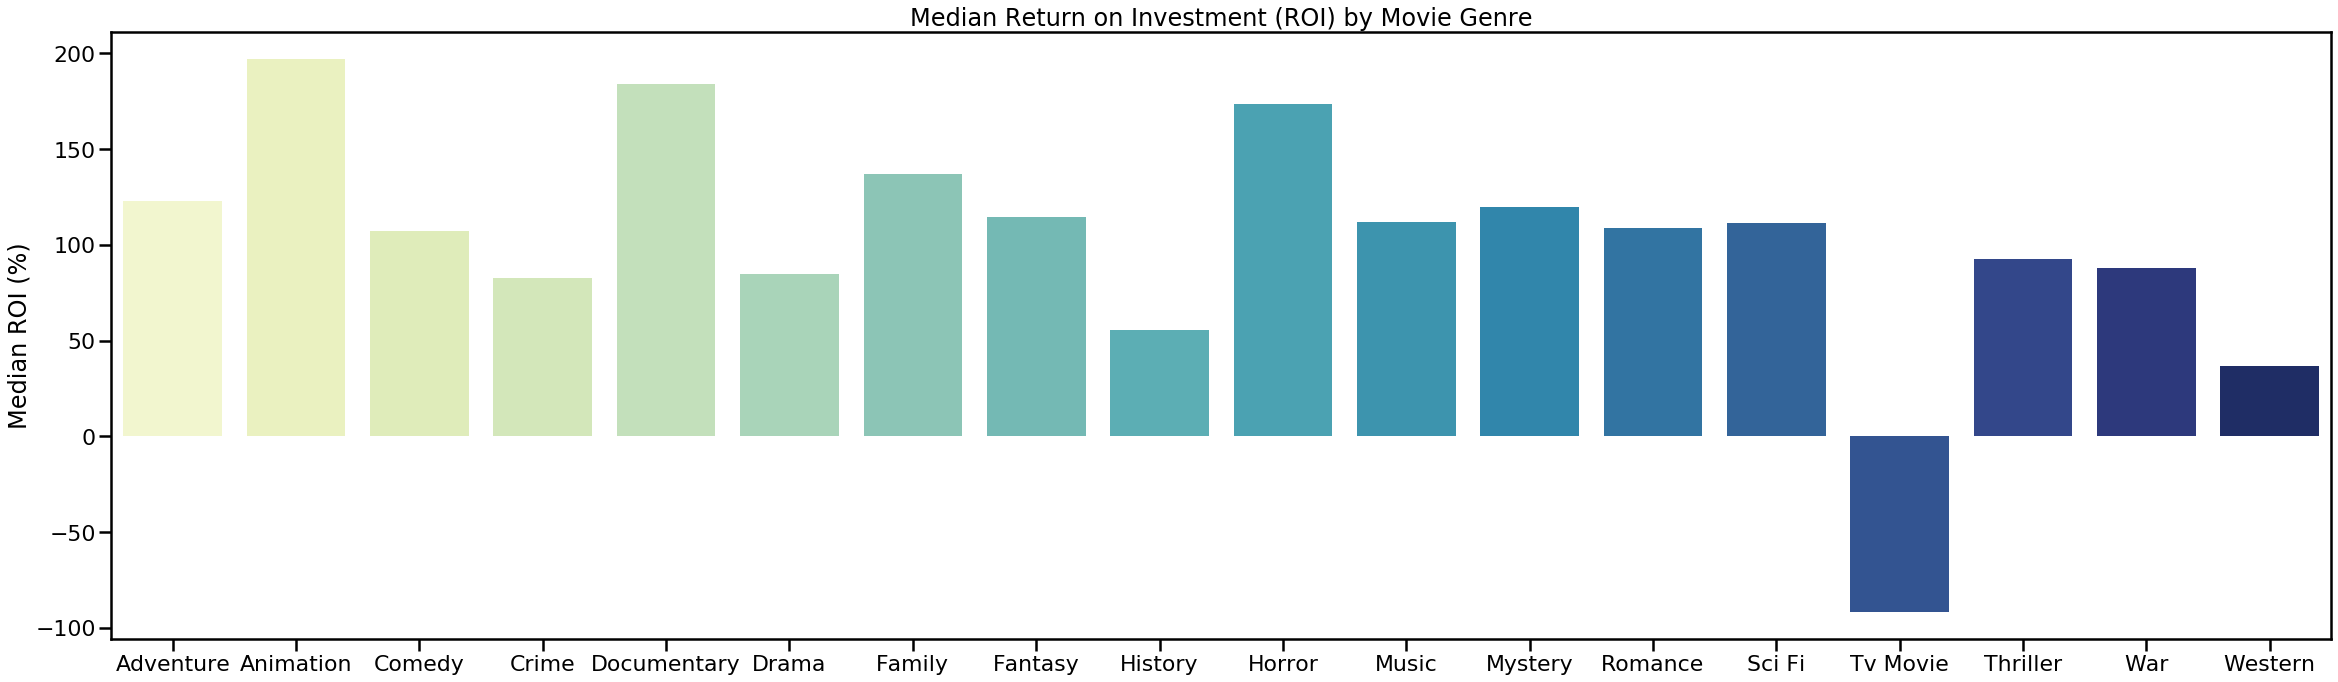

In [56]:
fig, ax = plt.subplots()
sns.set_context(context)
fig.set_size_inches(size_long)
ROI_plot = sns.barplot(titles_clean, ROIs, palette = palette, ax=ax)
ROI_plot.set_title("Median Return on Investment (ROI) by Movie Genre")
ROI_plot.set_ylabel("Median ROI (%)")
plt.tight_layout()
plt.savefig(figpath + "Median ROI Genre.png")
plt.show()

In [18]:
def revenue_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["worldwide_gross"].loc[True]
        except KeyError:
            return None

In [19]:
median_revenue_genre = {}
for genre in genre_names:
    median_revenue_genre[genre] = revenue_by_genre(genre, clean_df)

In [20]:
median_revenue_genre

{'adventure': 123053021.5,
 'animation': 216562312.0,
 'comedy': 41216751.0,
 'crime': 43926927.5,
 'documentary': 4337162.5,
 'drama': 29286937.5,
 'family': 98114471.0,
 'fantasy': 113439644.5,
 'history': 37297300.0,
 'horror': 38660873.5,
 'music': 23323631.0,
 'mystery': 53990972.5,
 'romance': 34343438.0,
 'science_fiction': 75059552.5,
 'tv_movie': 252726.0,
 'thriller': 49486874.0,
 'war': 49196532.0,
 'western': 15506815.5}

In [21]:
titles_clean_rev = list(clean_titles(list(median_revenue_genre.keys())).values())

In [22]:
rev = list(median_revenue_genre.values())

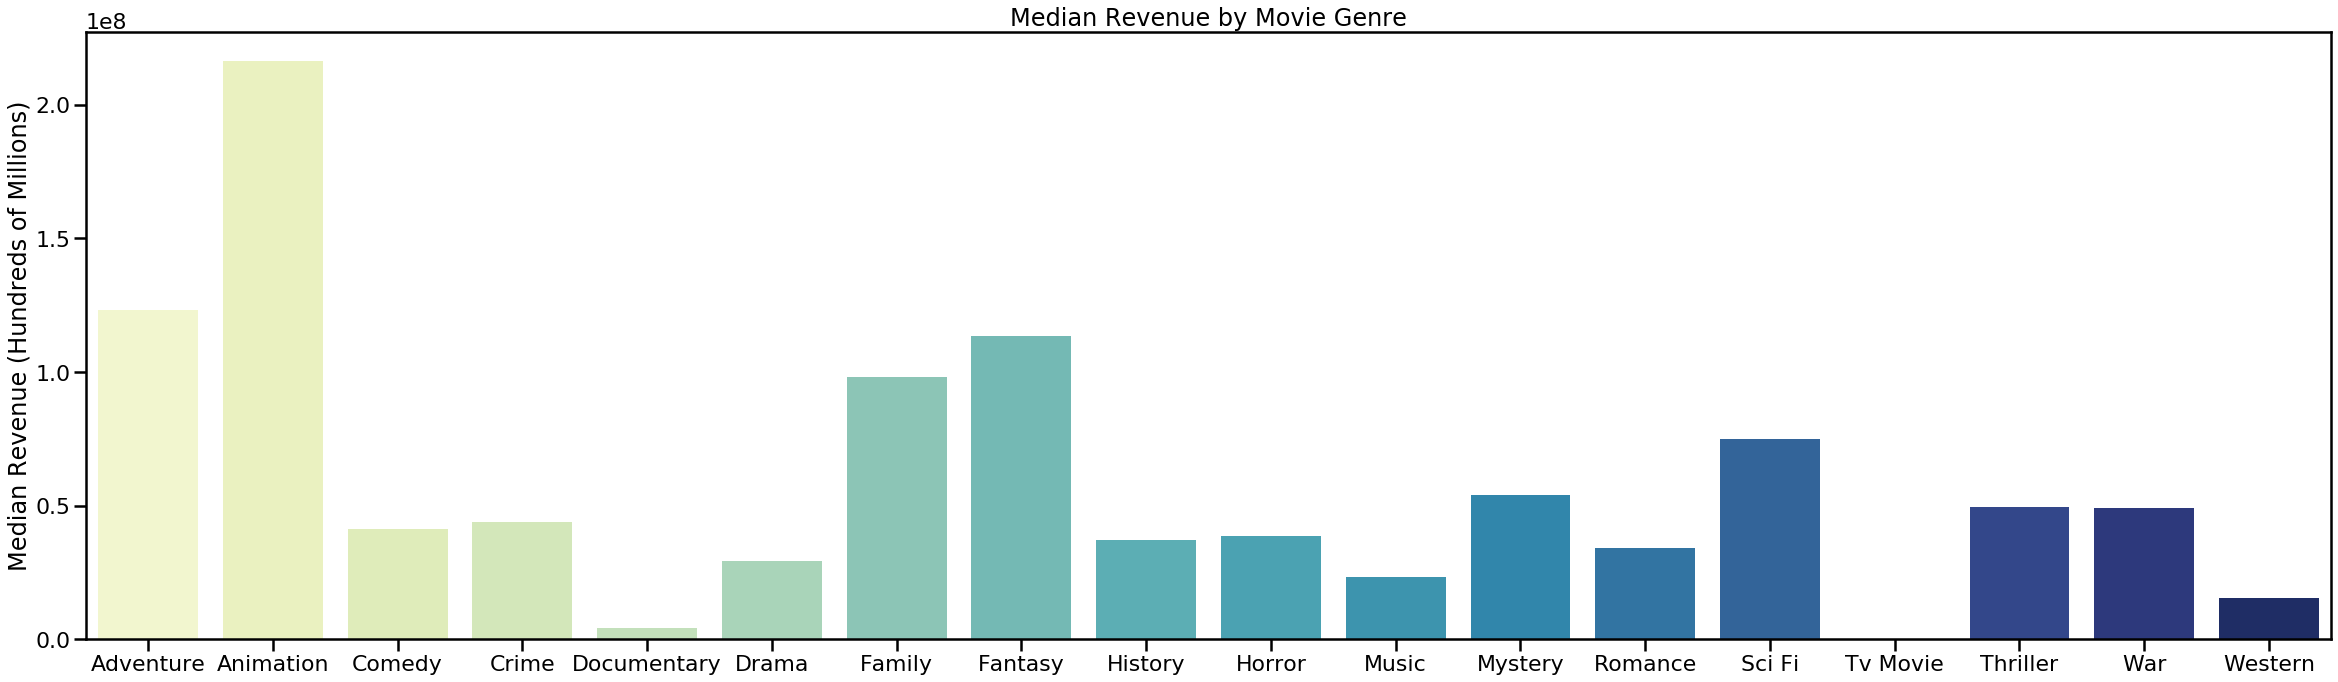

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
rev_plot = sns.barplot(titles_clean_rev, rev, palette = palette, ax=ax)
rev_plot.set_title("Median Revenue by Movie Genre")
rev_plot.set_ylabel("Median Revenue (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Median Rev Genre.png")
plt.show()

In [24]:
# Which genre has been the most/least profitable (ROI) in the last 10 years?
# Which genre has had the highest/lowest revenue in the last 10 years?
last_10 = clean_df[clean_df["year"] >= 2010]

In [25]:
median_roi_genre_10 = {}
for genre in genre_names:
    median_roi_genre_10[genre] = roi_by_genre(genre, last_10)

In [26]:
clean_titles_10 = list(clean_titles(list(median_roi_genre_10.keys())).values())

In [27]:
ROIs_10 = list(median_roi_genre_10.values())

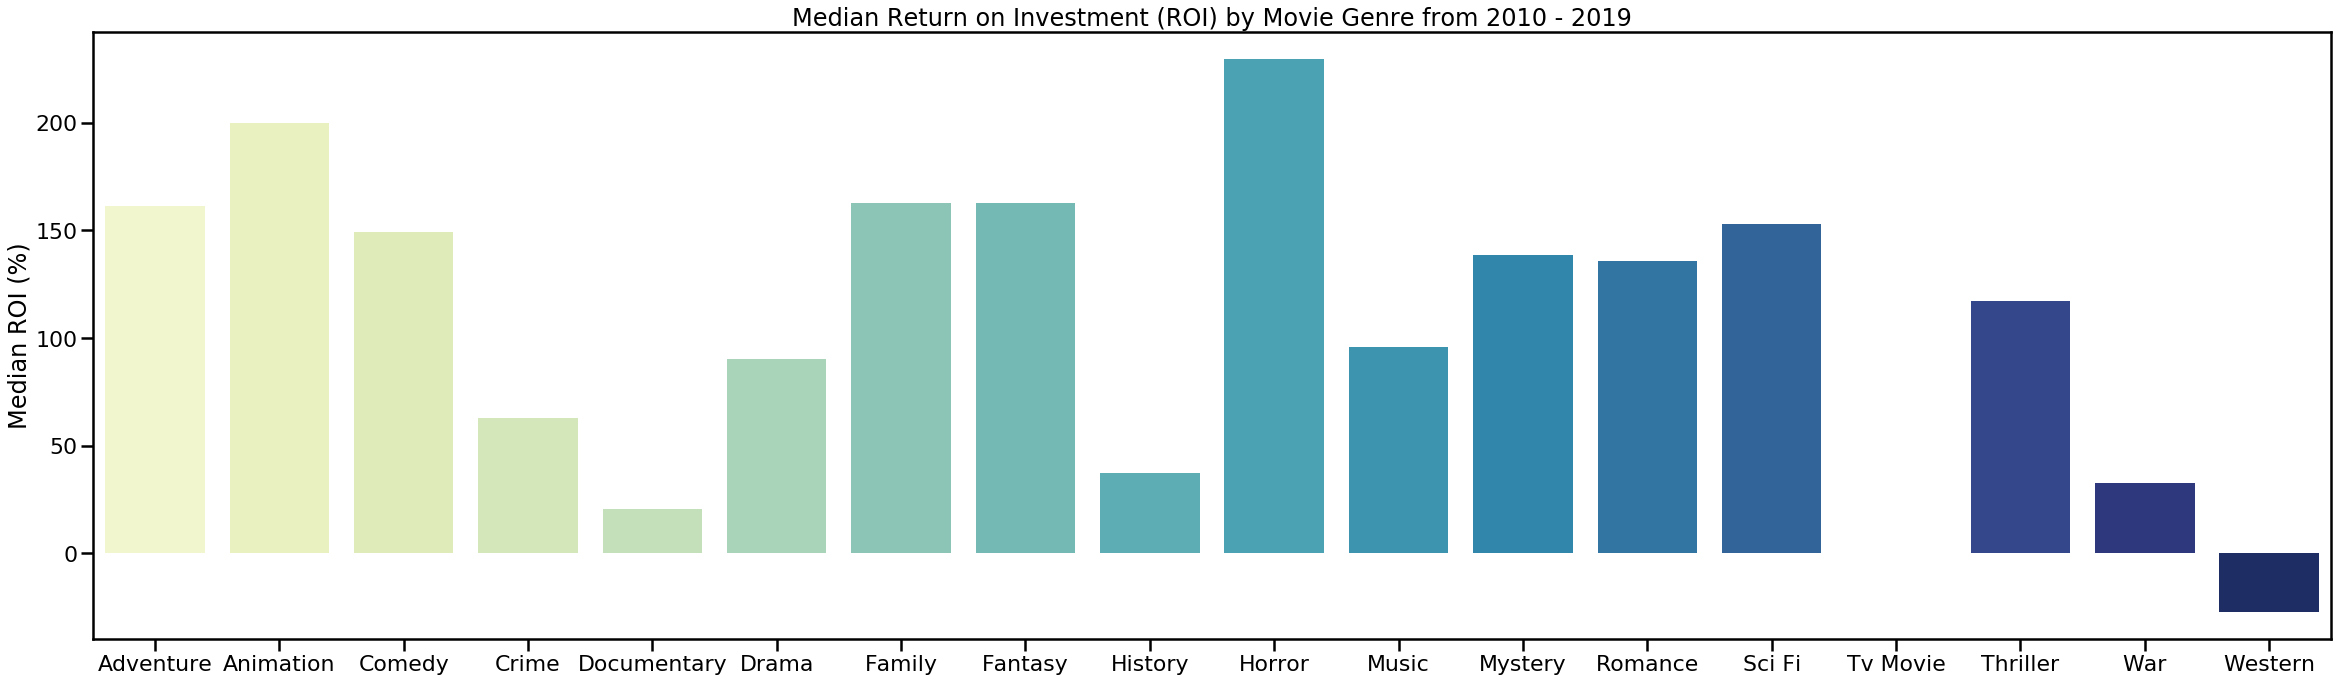

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
ROI_plot_10 = sns.barplot(clean_titles_10, ROIs_10, palette = palette, ax=ax)
ROI_plot_10.set_title("Median Return on Investment (ROI) by Movie Genre from 2010 - 2019")
ROI_plot_10.set_ylabel("Median ROI (%)")
plt.tight_layout()
plt.savefig(figpath + "Median ROI Genre 10.png")
plt.show()

In [29]:
median_revenue_genre_10 = {}
for genre in genre_names:
    median_revenue_genre_10[genre] = revenue_by_genre(genre, last_10)

In [30]:
titles_rev_10 = list(clean_titles(median_revenue_genre_10.keys()).values())

In [31]:
rev_10 = list(median_revenue_genre_10.values())

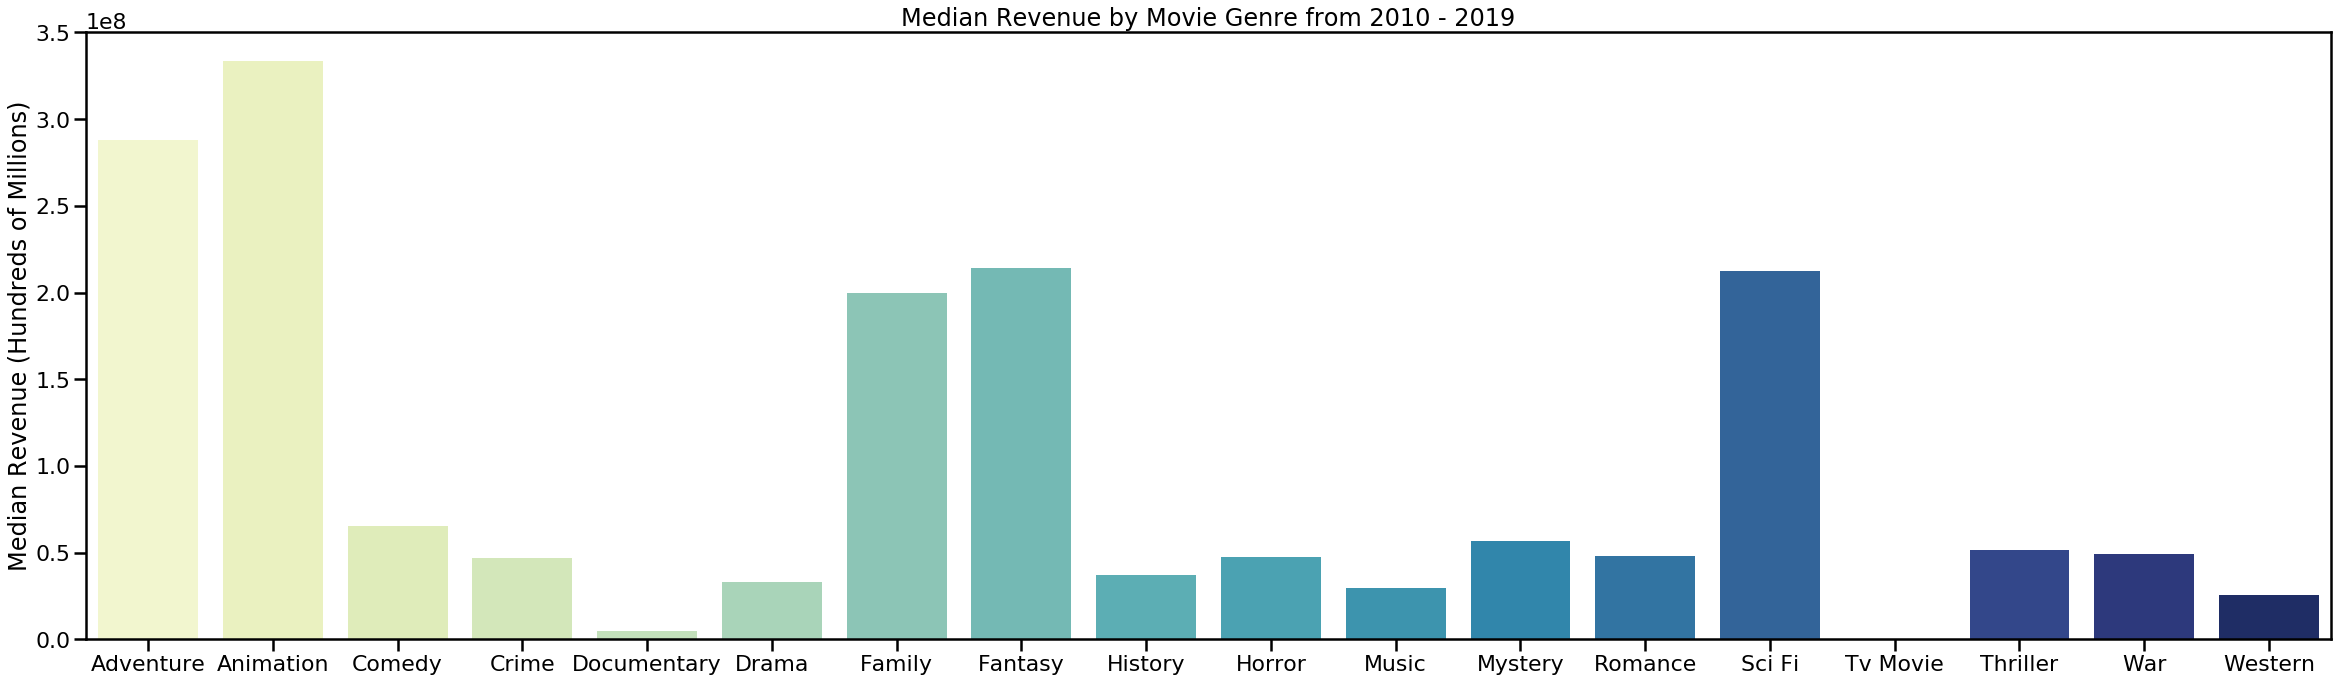

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
ROI_plot_10 = sns.barplot(titles_rev_10, rev_10,palette = palette, ax=ax)
ROI_plot_10.set_title("Median Revenue by Movie Genre from 2010 - 2019")
ROI_plot_10.set_ylabel("Median Revenue (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Median Rev Genre 10.png")
plt.show()

In [33]:
# Does a higher movie budget equate to higher ROI?
# Does a higher movie budget equate to higher revenue?
budget_vs_profit = clean_df[["production_budget", "roi (%)", "worldwide_profit(loss)", "worldwide_gross"]]

In [34]:
def remove_outliers(df, column_name):
    q1 = df[column_name].describe()['25%']
    q3 = df[column_name].describe()['75%']
    iqr = q3 - q1
    return df.loc[(df[column_name]>=(q1-(1.5*iqr))) & (df[column_name]<=(q3+(1.5*iqr)))]

In [35]:
budget_vs_profit

,production_budget,roi (%),worldwide_profit(loss),worldwide_gross
0,425000000,553.257713,2351345279,2776345279
1,410600000,154.667286,635063875,1045663875
2,350000000,-57.210757,-200237650,149762350
3,330600000,324.384139,1072413963,1403013963
4,300000000,582.711400,1748134200,2048134200
...,...,...,...,...
4156,25000,11434.644000,2858661,2883661
4157,25000,1859.168000,464792,489792
4158,23000,5236.991304,1204508,1227508
4159,7000,11927.514286,834926,841926


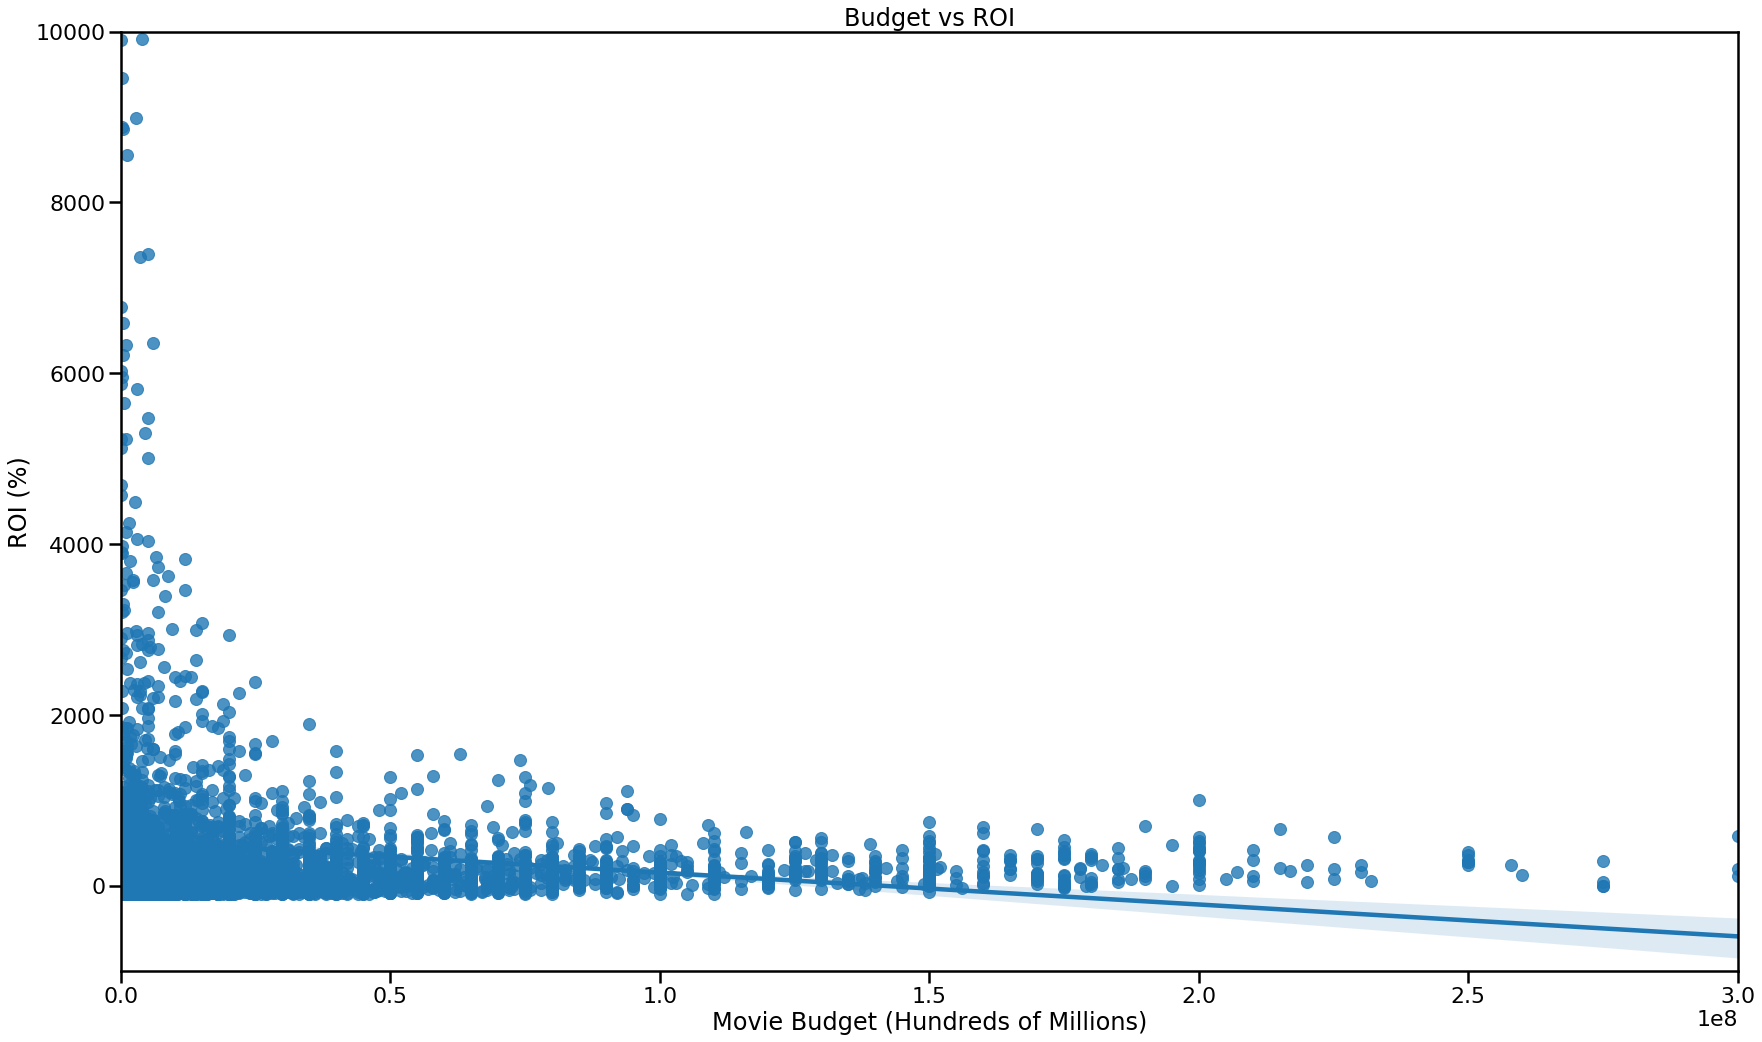

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="roi (%)", data = budget_vs_profit, ax = ax)
budget_profit_plot.set_title("Budget vs ROI")
budget_profit_plot.set_ylabel("ROI (%)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
budget_profit_plot.set(xlim = (0, 300000000), ylim = (-1000, 10000))
plt.tight_layout()
plt.savefig(figpath + "Budget v ROI.png")
plt.show()

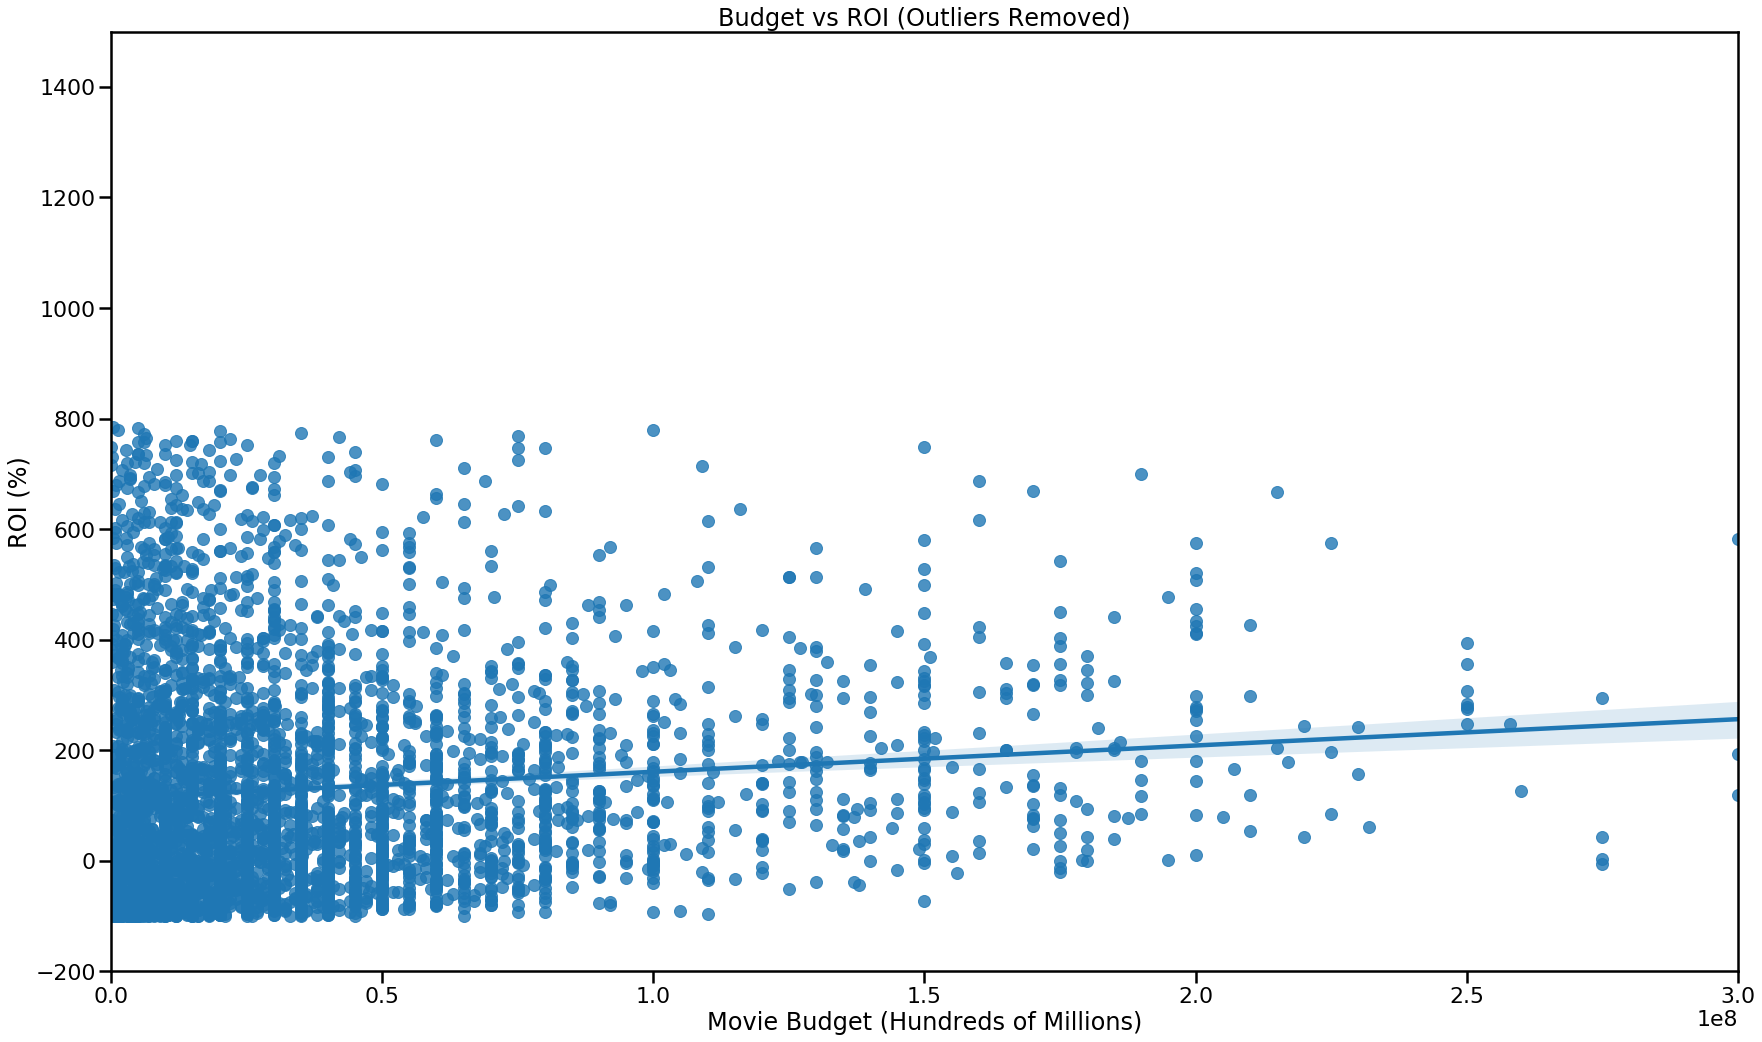

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="roi (%)", data = remove_outliers(budget_vs_profit, "roi (%)"), ax = ax)
budget_profit_plot.set_title("Budget vs ROI (Outliers Removed)")
budget_profit_plot.set_ylabel("ROI (%)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
budget_profit_plot.set(xlim = (0, 300000000), ylim = (-200, 1500))
plt.tight_layout()
plt.savefig(figpath + "Budget v ROI No Outliers.png")
plt.show()

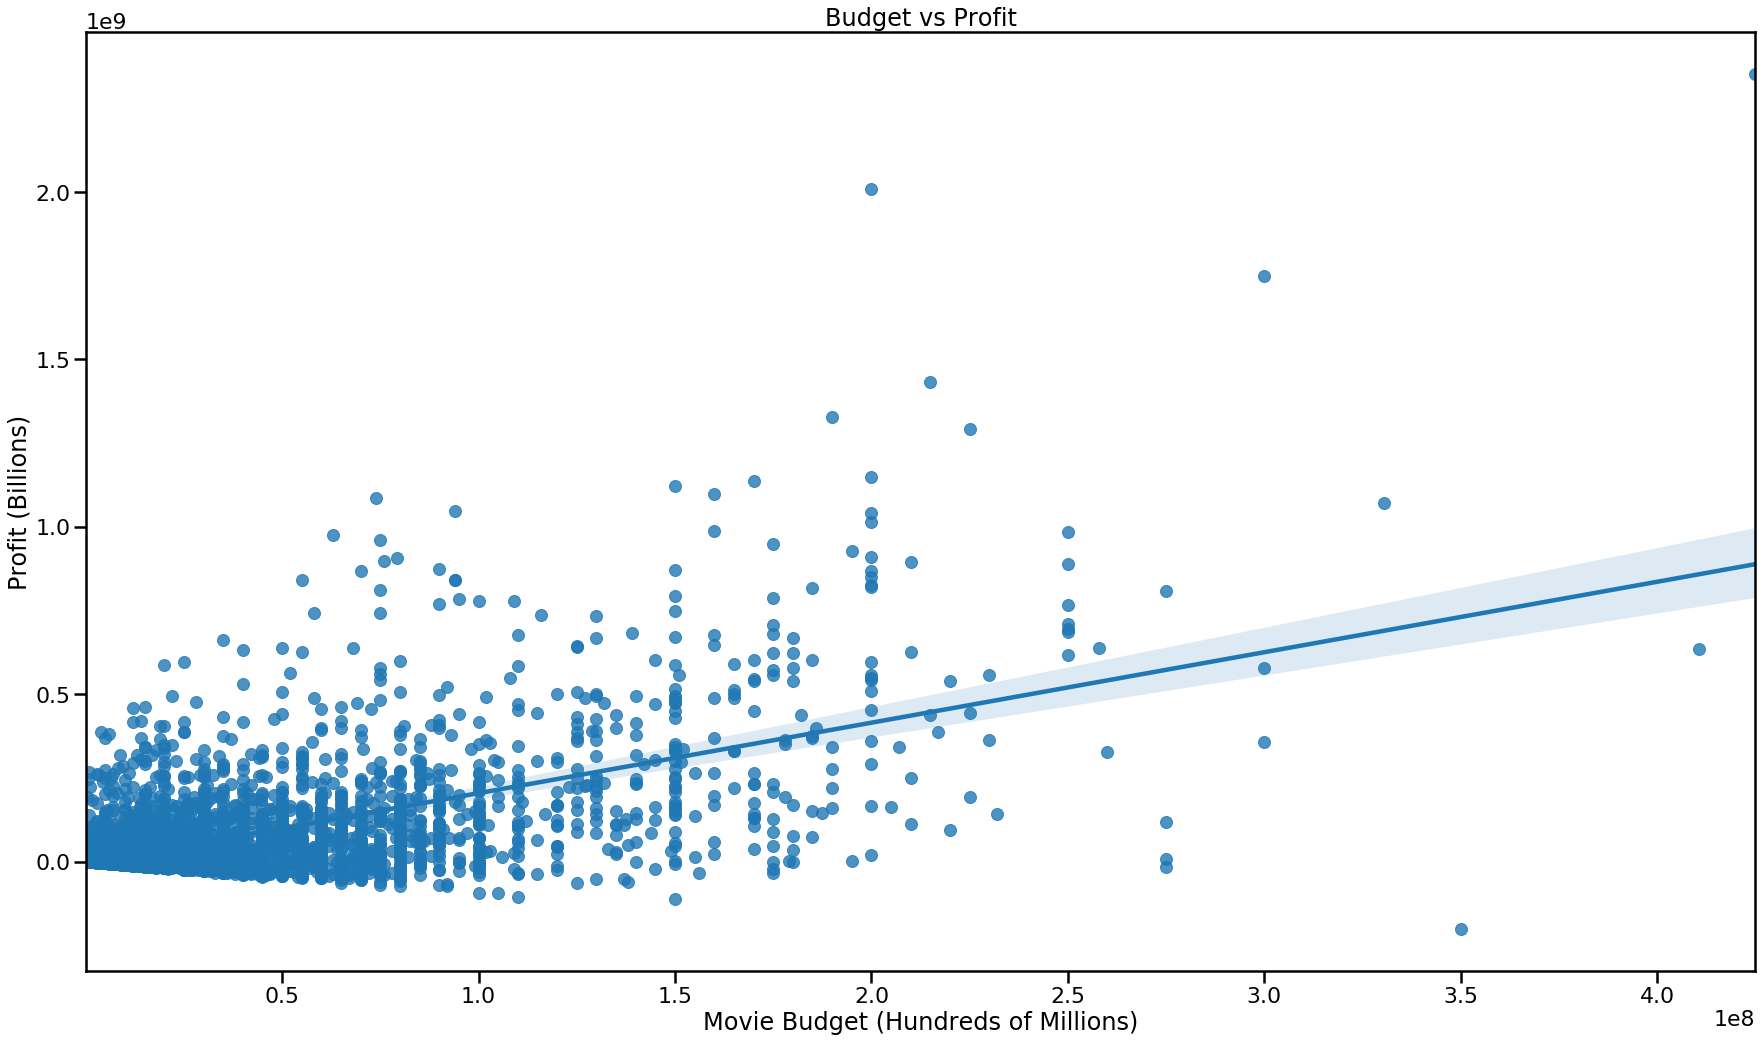

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_profit(loss)", data = budget_vs_profit, ax = ax)
budget_profit_plot.set_title("Budget vs Profit")
budget_profit_plot.set_ylabel("Profit (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Profit.png")
plt.show()

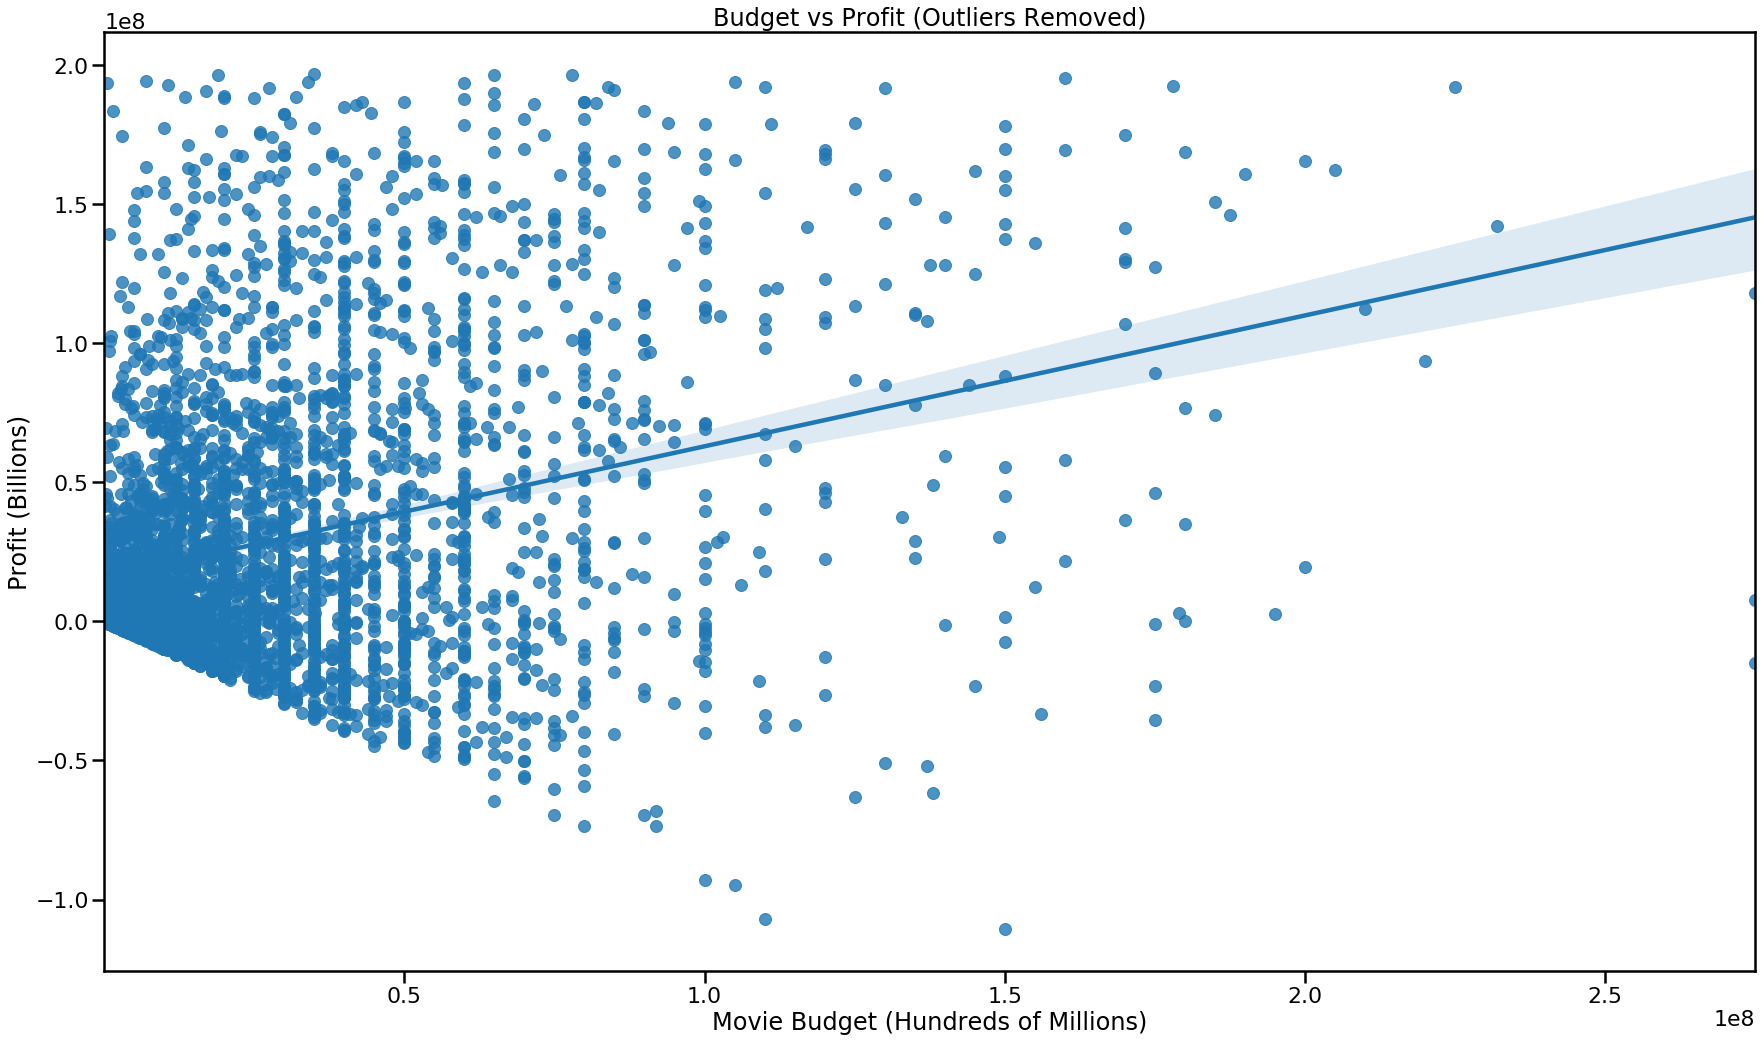

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_profit(loss)", data = remove_outliers(budget_vs_profit, "worldwide_profit(loss)"), ax = ax)
budget_profit_plot.set_title("Budget vs Profit (Outliers Removed)")
budget_profit_plot.set_ylabel("Profit (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Profit No Outliers.png")
plt.show()

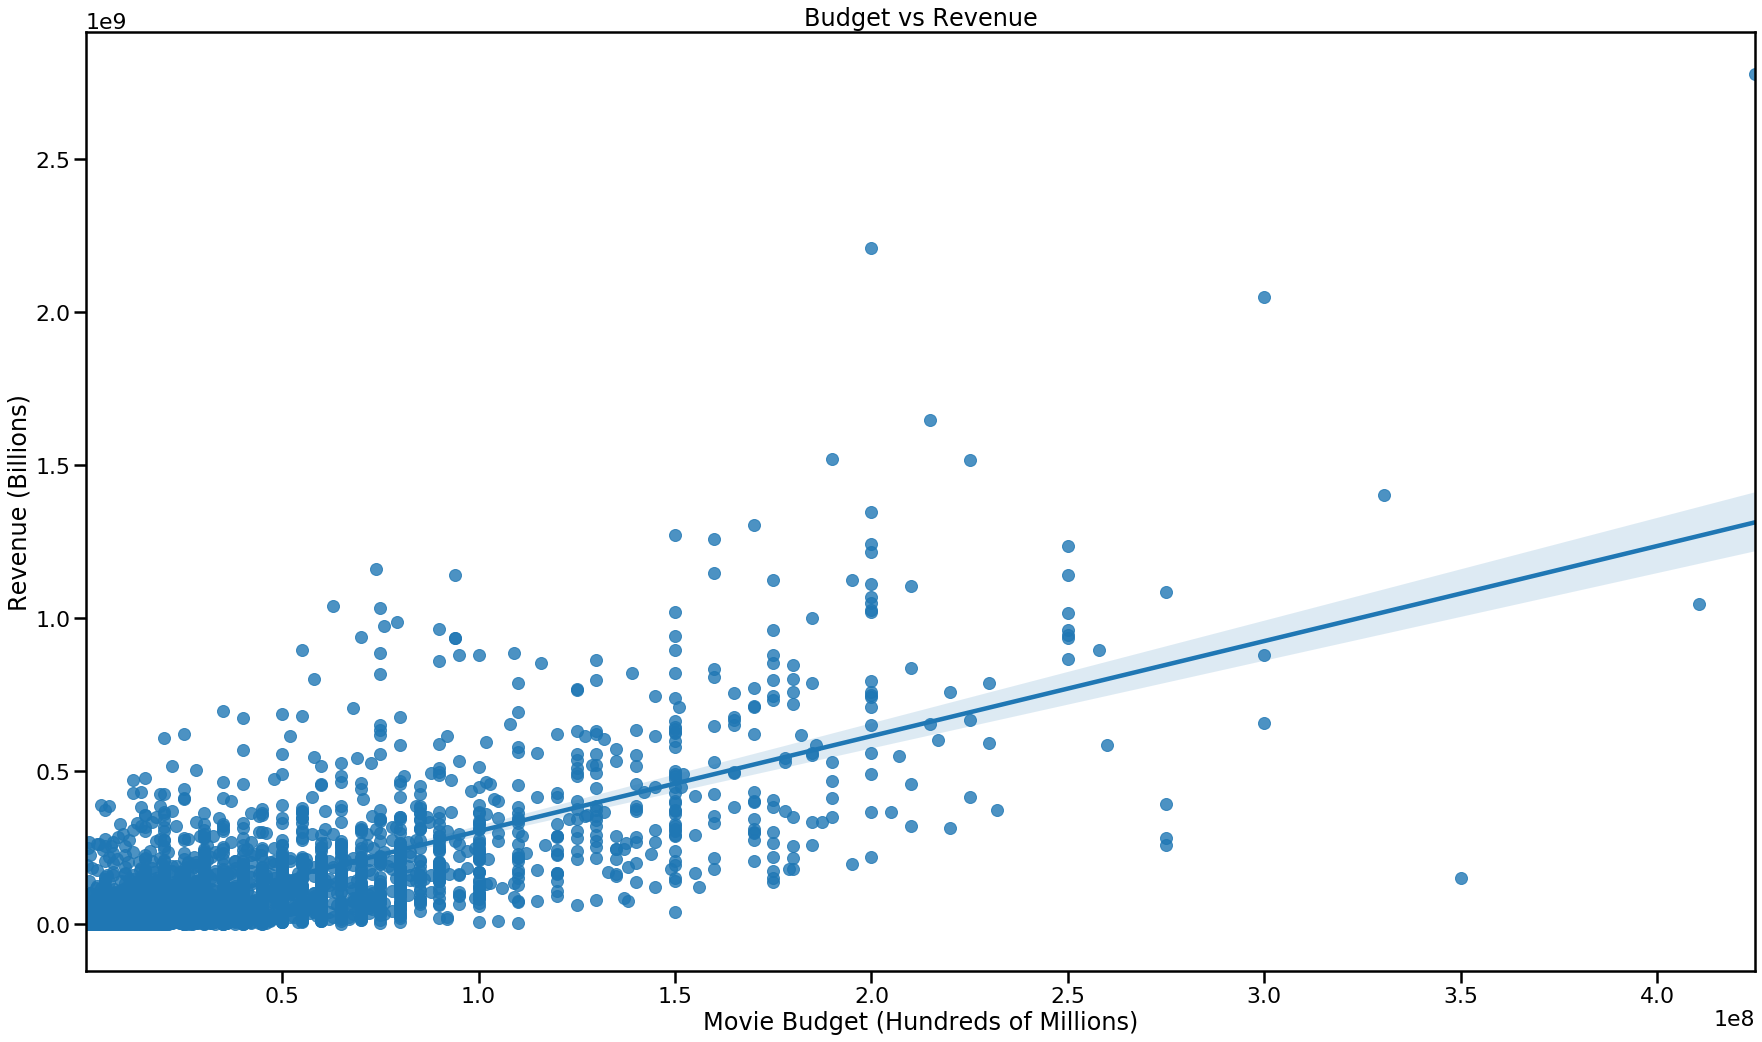

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_gross", data = budget_vs_profit, ax = ax)
budget_profit_plot.set_title("Budget vs Revenue")
budget_profit_plot.set_ylabel("Revenue (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Rev.png")
plt.show()

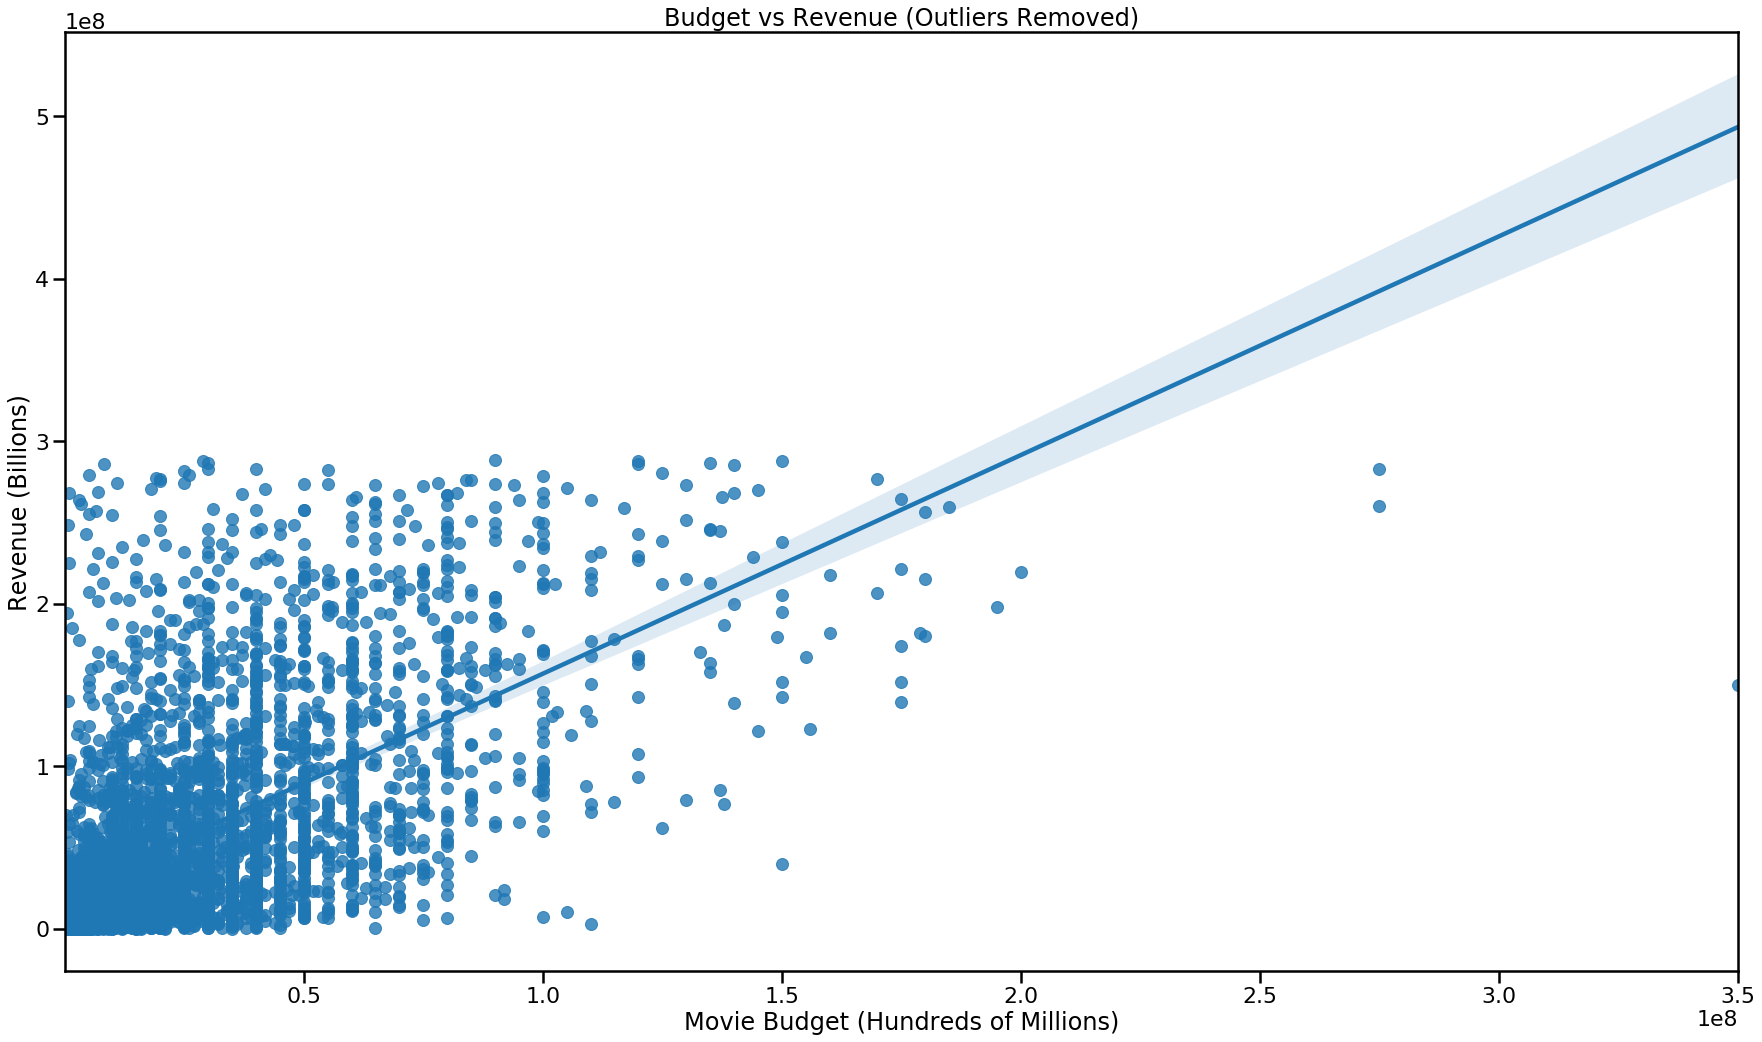

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(size_square)
budget_profit_plot = sns.regplot(x="production_budget", y="worldwide_gross", data = remove_outliers(budget_vs_profit, "worldwide_gross"), ax = ax)
budget_profit_plot.set_title("Budget vs Revenue (Outliers Removed)")
budget_profit_plot.set_ylabel("Revenue (Billions)")
budget_profit_plot.set_xlabel("Movie Budget (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Budget v Rev No Outliers.png")
plt.show()

In [42]:
# Which popular genre combinations are the most/least profitable (ROI)?
# Which popular genre combination has the highest/lowest revenue?

In [43]:
def roi_by_genres(genre1, genre2, df):
        try:
            return df.groupby([genre1, genre2]).median()["roi (%)"].loc[True].loc[True]
        except KeyError:
            return None

In [44]:
roi_by_genres("romance", "comedy", clean_df)

113.22021666666666

In [45]:
genre_combinations = [["romance", "comedy"], ["romance", "drama"], ["drama", "thriller"], ["thriller", "crime"], ["action", "adventure"], ["action", "thriller"], ["drama", "comedy"], ["thriller", "horror"], ["comedy", "animation"]]

In [46]:
genre_combos = {}
for combo in genre_combinations:
    genre_combos[str(combo)] = roi_by_genres(combo[0], combo[1], clean_df)

In [47]:
genre_combos

{"['romance', 'comedy']": 113.22021666666666,
 "['romance', 'drama']": 108.78637857142857,
 "['drama', 'thriller']": 73.17679692307692,
 "['thriller', 'crime']": 66.60828285714285,
 "['action', 'adventure']": 125.46396071428572,
 "['action', 'thriller']": 79.06028610294118,
 "['drama', 'comedy']": 89.5863,
 "['thriller', 'horror']": 164.6864358974359,
 "['comedy', 'animation']": 215.32571727272727}

In [48]:
def clean_combos(title_combos):
    clean_combos = {}
    for title in title_combos:
        clean_combos[title] = title.strip("[]").replace(",", " -").replace("'", "").title()
    return clean_combos
title_combos = list(clean_combos(genre_combos.keys()).values())

In [49]:
ROI_combos = list(genre_combos.values())

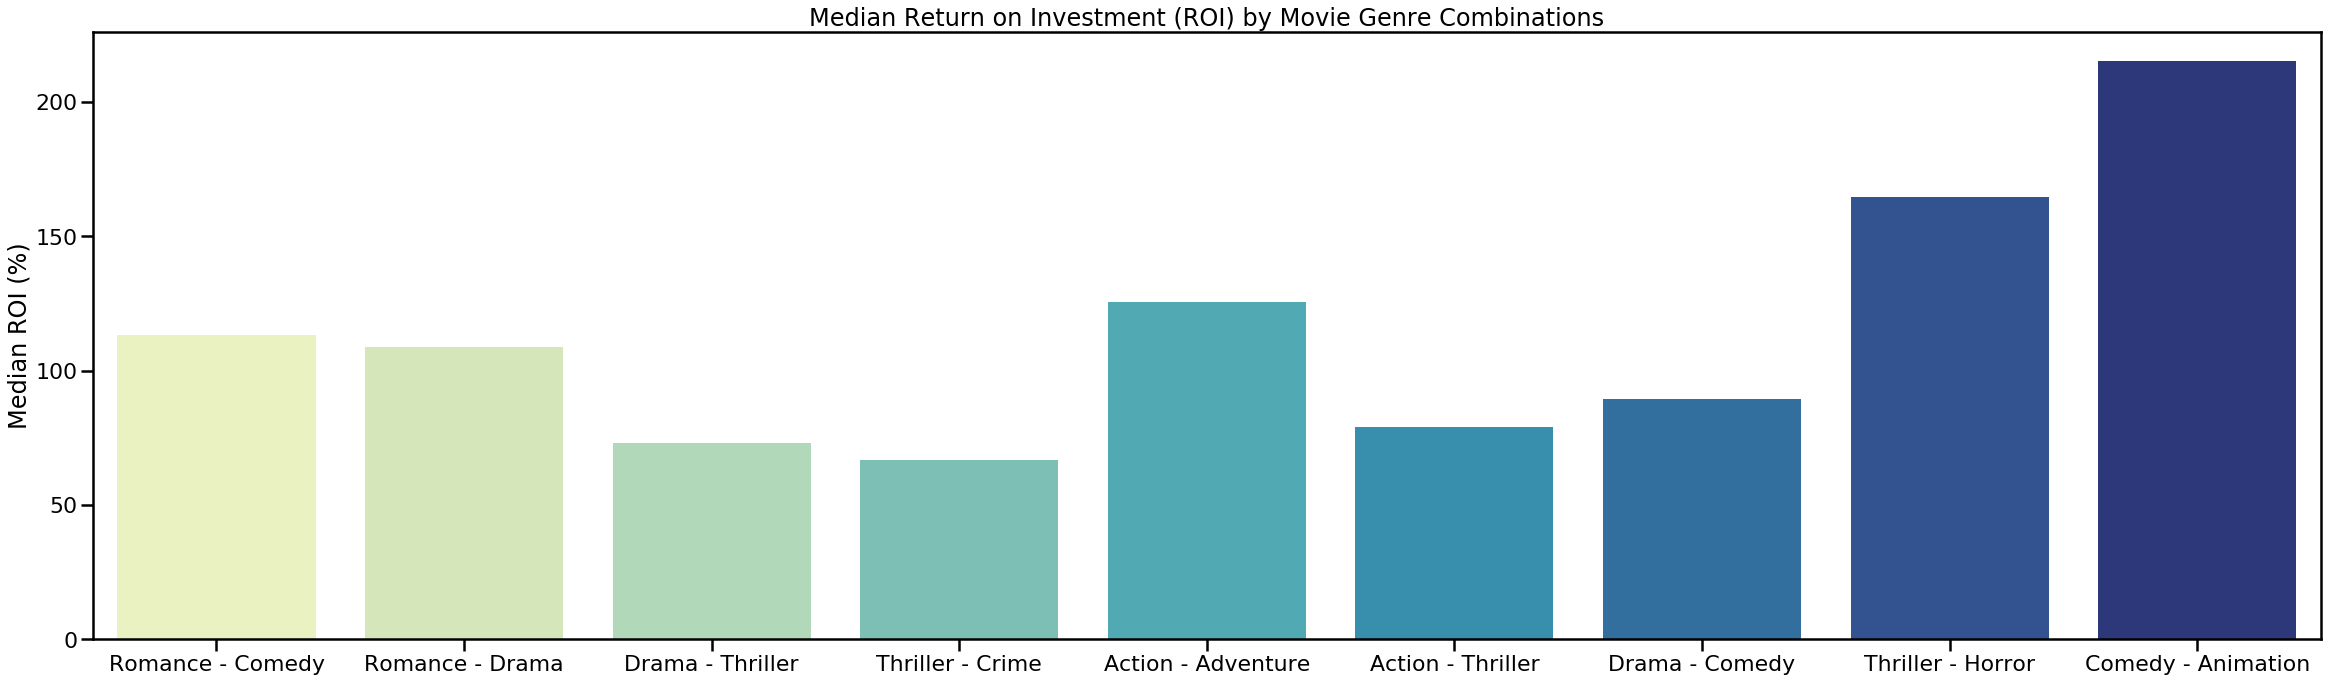

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
combo_plot = sns.barplot(title_combos, ROI_combos, palette = palette, ax=ax)
combo_plot.set_title("Median Return on Investment (ROI) by Movie Genre Combinations")
combo_plot.set_ylabel("Median ROI (%)")
plt.tight_layout()
plt.savefig(figpath + "Genre Combo ROI.png")
plt.show()

In [51]:
def revenue_by_genres(genre1, genre2, df):
        try:
            return df.groupby([genre1, genre2]).median()["worldwide_gross"].loc[True].loc[True]
        except KeyError:
            return None

In [52]:
genre_combos_rev = {}
for combo in genre_combinations:
    genre_combos_rev[str(combo)] = revenue_by_genres(combo[0], combo[1], clean_df)

In [53]:
title_combos_rev = list(clean_combos(genre_combos_rev.keys()).values())

In [54]:
combos_rev = list(genre_combos_rev.values())

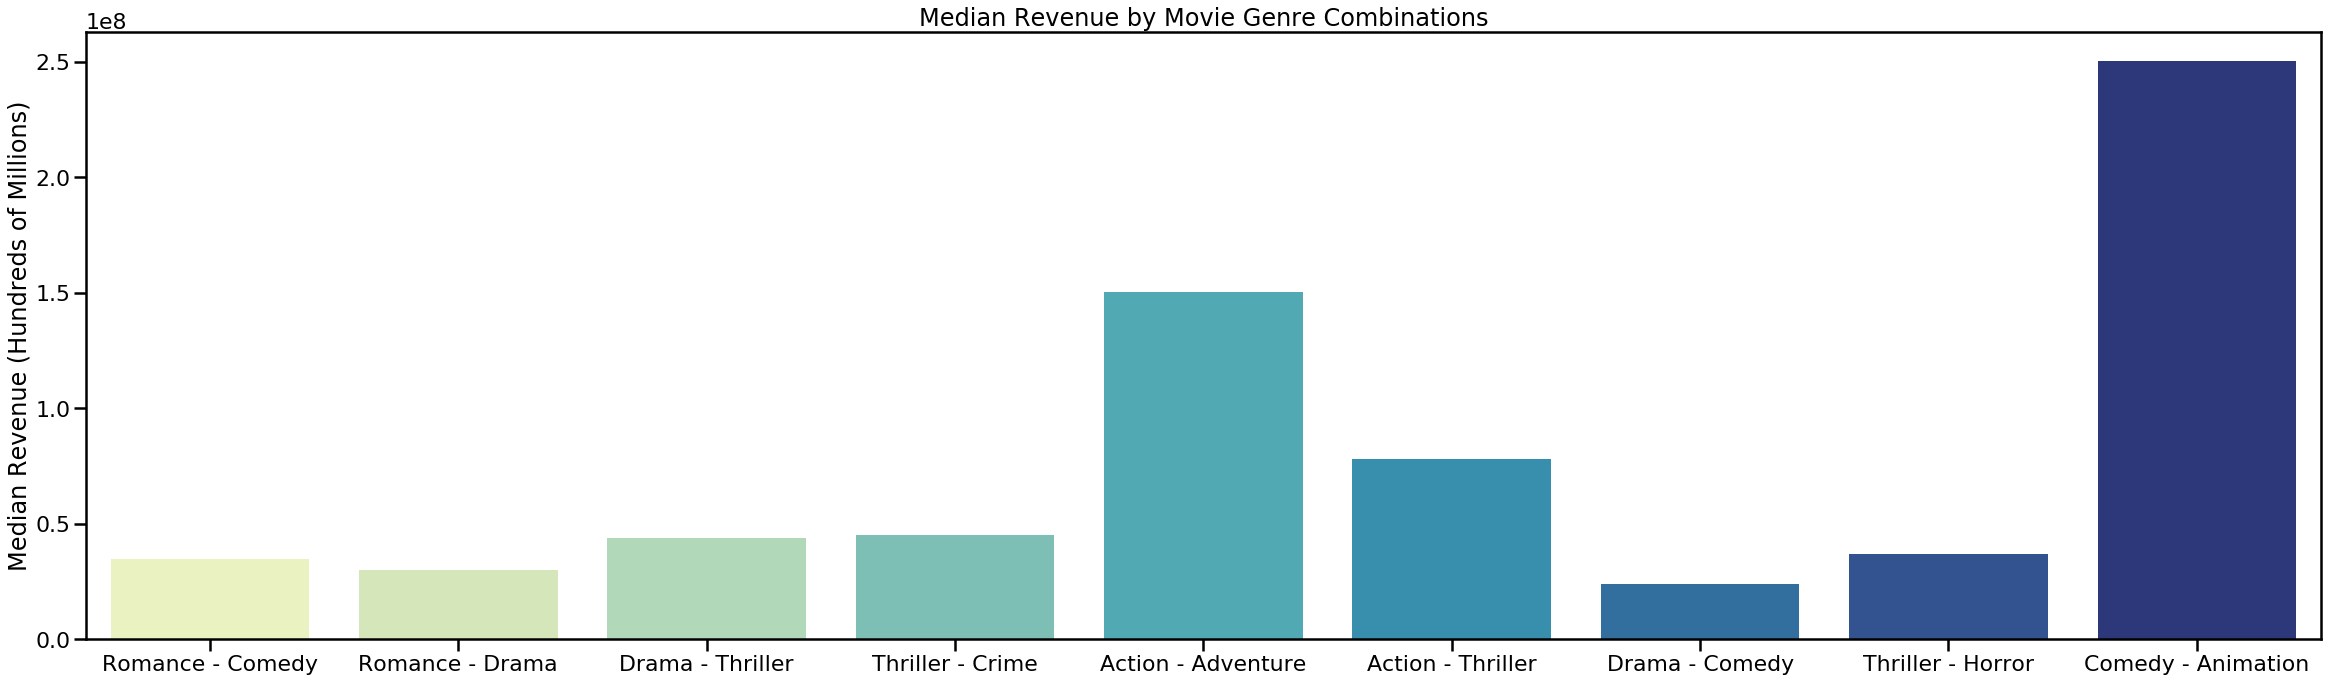

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(size_long)
combo_plot = sns.barplot(title_combos_rev, combos_rev, palette = palette, ax=ax)
combo_plot.set_title("Median Revenue by Movie Genre Combinations")
combo_plot.set_ylabel("Median Revenue (Hundreds of Millions)")
plt.tight_layout()
plt.savefig(figpath + "Genre Combos Rev.png")
plt.show()